In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
# Reading the csv file
gps = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
gps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
# Checking the head() of the dataframe
gps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
# Checking the tail() 
gps.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Checking the info() 
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Describing the dataframe elements
gps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# Reviewing the Columns available in the dataframe
gps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
# Describing the Object datatype columns, the code below will show all columns excluding int and float dtype columns
gps.select_dtypes(exclude=['int64', 'float64']).describe()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [9]:
# Verfying the max value in Ratings 
max_value = gps['Rating'].idxmax()
max_rating = gps.loc[max_value]
print(max_rating)

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object


In [10]:
# Removing/dropping the outlier that is in Rating column, as the Category doesn't match and the Rating is also 19
gps = gps.drop(10472)

In [11]:
# Checking the null values
gps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

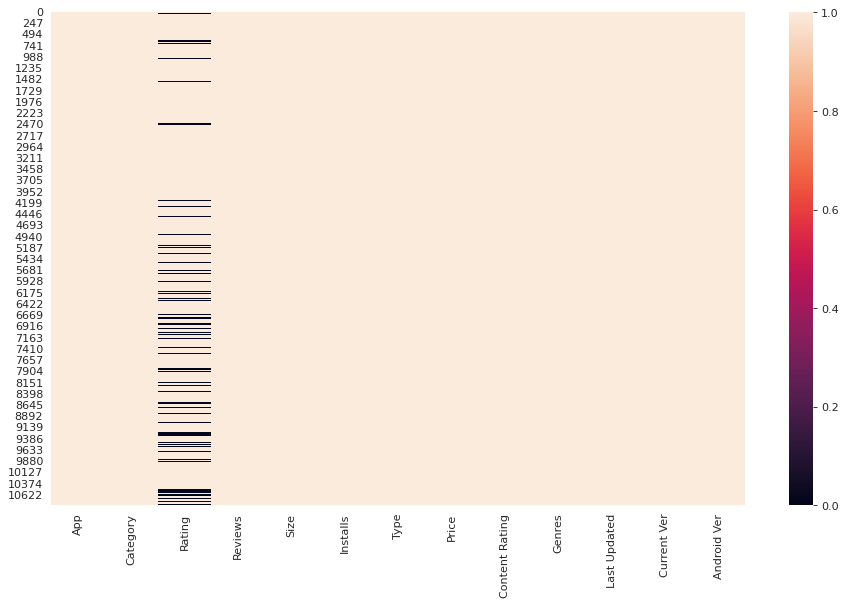

In [12]:
# plotting the heatmap to find nulls 
plt.figure(figsize=(14,8), dpi=80)
sns.heatmap(gps.notna())
plt.show()

In [13]:
# Checking if the Installs column contains numeric data
gps['Installs'].str.isnumeric().value_counts()

Installs
False    10839
True         1
Name: count, dtype: int64

In [14]:
# Replacing the special characters in Installs column to make it numeric
gps['Installs'] = gps['Installs'].str.replace('+', '')
gps['Installs'] = gps['Installs'].str.replace(',', '')
gps['Installs'] = gps['Installs'].str.replace('Free', '0')

In [15]:
gps.Installs.str.isnumeric().value_counts()

Installs
True    10840
Name: count, dtype: int64

In [16]:
# Converting the datatype of the Reviews and Installs column to interger by cleaning all the string or special characters
gps[['Reviews', 'Installs']] = gps[['Reviews', 'Installs']].astype(int)

In [17]:
# Reviewing the info() 
gps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


In [18]:
# Checking the count of Nan values in Rating column
gps['Rating'].isna().value_counts()

Rating
False    9366
True     1474
Name: count, dtype: int64

In [19]:
# Finding out the mean of Rating on the basis of Category to replace it in place of blanks
gps.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

In [20]:
# Filling the Nan values in Rating column with mean value calculated of the corresponding Category
gps['Rating'].fillna(gps.groupby('Category')['Rating'].transform('mean'), inplace=True)

In [21]:
gps.Rating.isna().value_counts()

Rating
False    10840
Name: count, dtype: int64

# **Recommended Analysis**

# **Q.1 Which is the most used Android Version?**

In [22]:
# Counting the values in Android ver columns 
print(gps['Android Ver'].value_counts())
'''As the data speaks the most used Android Version is 4.1 and above with the highest counts of 2451'''

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64


'As the data speaks the most used Android Version is 4.1 and above with the highest counts of 2451'

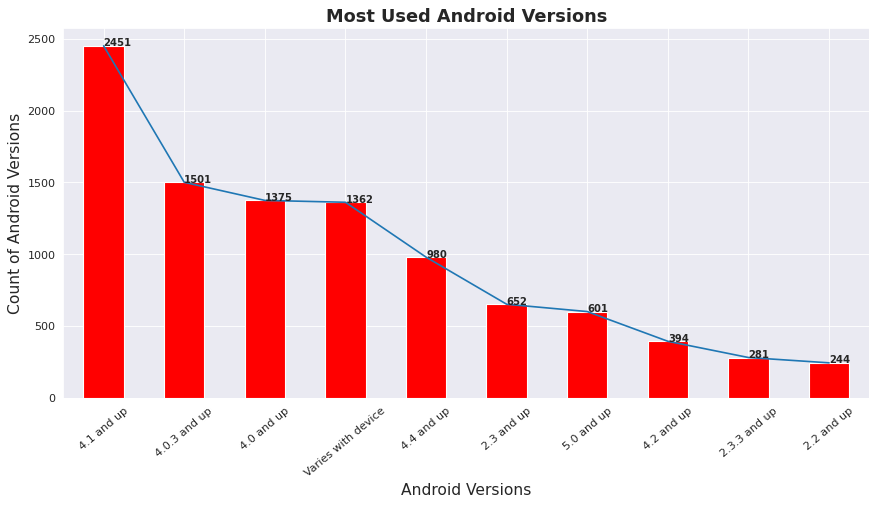

In [23]:
# Plotting the above results
and_ver = gps['Android Ver'].value_counts(ascending=False).head(10)

plt.figure(figsize=(13, 6), dpi=80)
and_ver.plot(kind='bar', color='red', x=and_ver.index.values, y=and_ver.values)
plt.plot(and_ver.index.values, and_ver.values)

for ind,score in zip(and_ver.index.values, and_ver.values):
    plt.text(ind,score,str(score), fontweight='bold', fontsize=9)
    
plt.xlabel('Android Versions', size=14)
plt.ylabel('Count of Android Versions', size=14)
plt.title('Most Used Android Versions', size=16, fontweight='bold')
plt.xticks(rotation=40)
plt.show()

# **Q.2  Which all categories of mobile apps are existing from this dataset?**

In [24]:
# Grouping the data by Category 
gps.groupby('Category').size().sort_values(ascending=False)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
dtype: int64

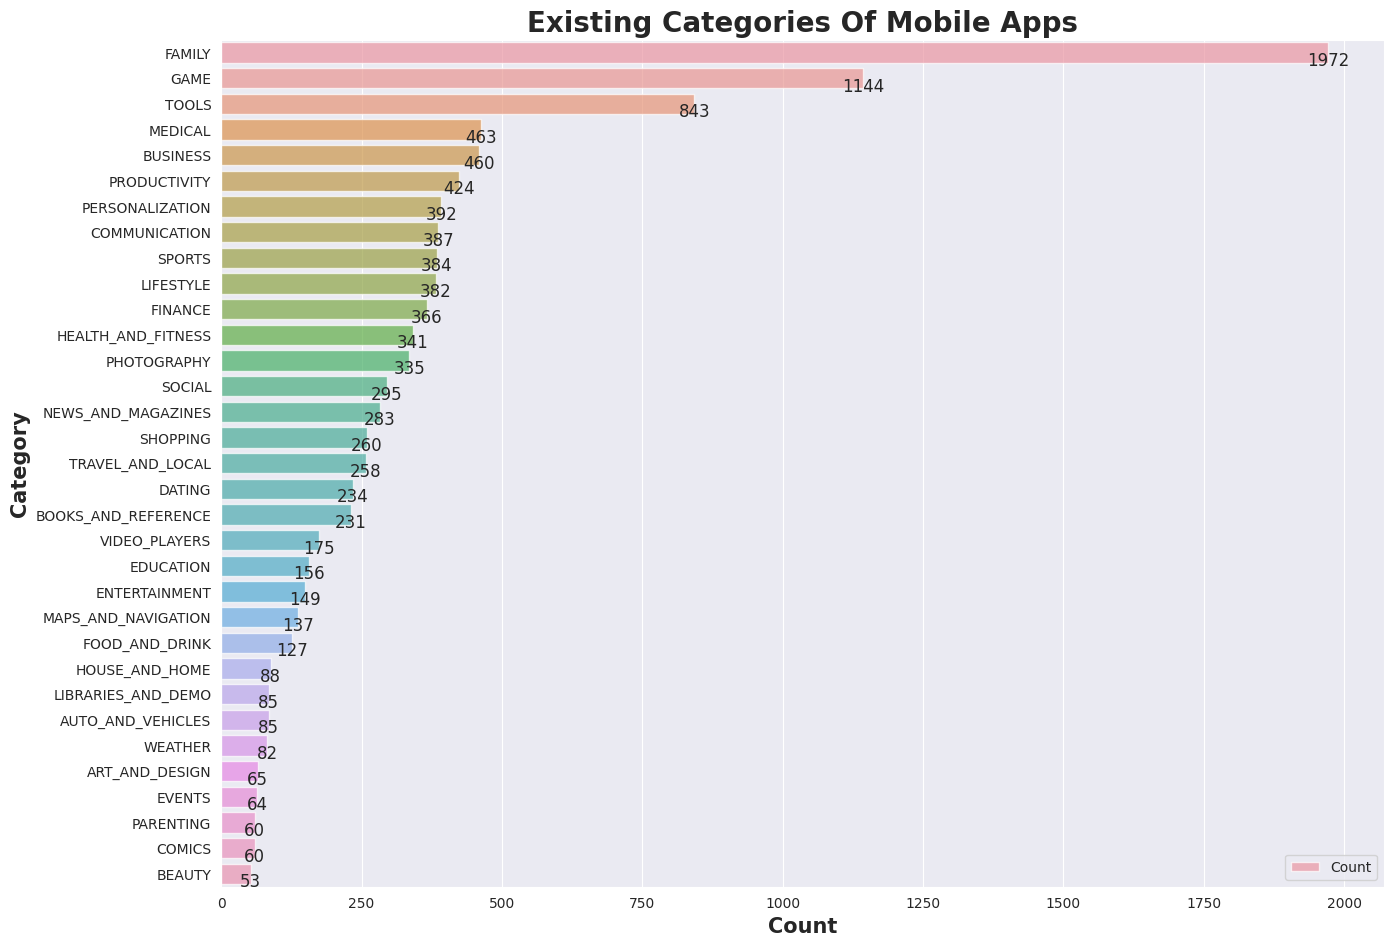

In [25]:
# Plotting the above results
existing_apps = gps.groupby('Category').size().sort_values(ascending=False)

plt.figure(figsize=(15, 11))
sns.barplot(x=existing_apps.values, y=existing_apps.index, orient='horizontal',
            label='Count', alpha=0.7, edgecolor='white')

for i, v in enumerate(existing_apps):
    plt.text(v-0.2, i+0.5, v, ha='center', size=12)

plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Category', fontsize=15, fontweight='bold')
plt.title('Existing Categories Of Mobile Apps', fontsize=20, fontweight='bold')

plt.legend()

plt.show()

# **Q.3 Which is the most installed category of mobile apps from this dataset?**

In [26]:
# Counting the values of Category on the basis of most Installs
gps.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   35086024415
COMMUNICATION          32647276251
PRODUCTIVITY           14176091369
SOCIAL                 14069867902
TOOLS                  11452771915
FAMILY                 10258263505
PHOTOGRAPHY            10088247655
NEWS_AND_MAGAZINES      7496317760
TRAVEL_AND_LOCAL        6868887146
VIDEO_PLAYERS           6222002720
SHOPPING                3247848785
ENTERTAINMENT           2869160000
PERSONALIZATION         2325494782
BOOKS_AND_REFERENCE     1921469576
SPORTS                  1751174498
HEALTH_AND_FITNESS      1583072512
BUSINESS                1001914865
FINANCE                  876648734
EDUCATION                871452000
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                537643539
WEATHER                  426100520
FOOD_AND_DRINK           273898751
DATING                   264310807
HOUSE_AND_HOME           168712461
ART_AND_DESIGN           124338100
LIBRARIES_AND_DEMO        62995910
COMICS                    56086150
MEDICAL    

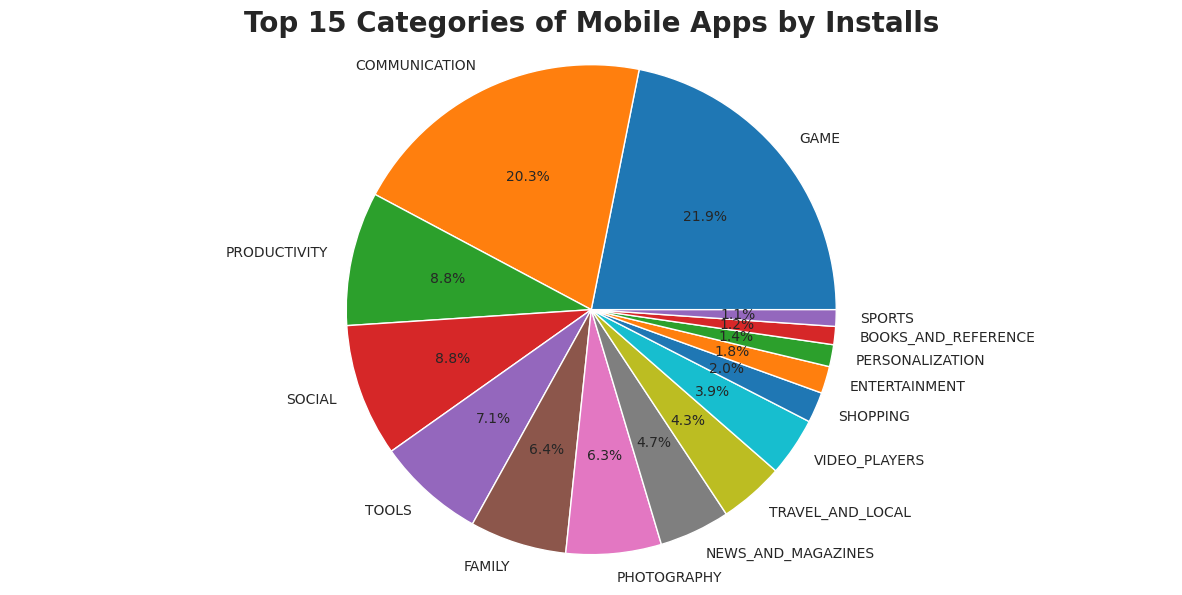

In [27]:
# Plotting the above results
installs = gps.groupby('Category')['Installs'].sum().sort_values(ascending=False)
top_categories = installs.head(15)

top_df = pd.DataFrame({'Category': top_categories.index, 'Installs': top_categories.values})
plt.figure(figsize=(15, 7))
plt.pie(top_df['Installs'], labels=top_df['Category'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 15 Categories of Mobile Apps by Installs', size=20, fontweight='bold')
plt.show()

# **Q.4 How many total categories are there?**

In [28]:
# Counting the total Categories 
print('The total number of categories are')
print(gps['Category'].nunique())

The total number of categories are
33


# **Q.5 Which are the top 10 mobile apps based on Ratings?**

In [29]:
gps[['App', 'Rating']].value_counts(ascending=False).head(10)

App                                                 Rating
ROBLOX                                              4.5       9
CBS Sports App - Scores, News, Stats & Watch Live   4.3       8
ESPN                                                4.2       7
Duolingo: Learn Languages Free                      4.7       7
8 Ball Pool                                         4.5       7
Candy Crush Saga                                    4.4       7
Nick                                                4.2       6
Bleacher Report: sports news, scores, & highlights  4.4       6
Subway Surfers                                      4.5       6
Sniper 3D Gun Shooter: Free Shooting Games - FPS    4.6       6
Name: count, dtype: int64

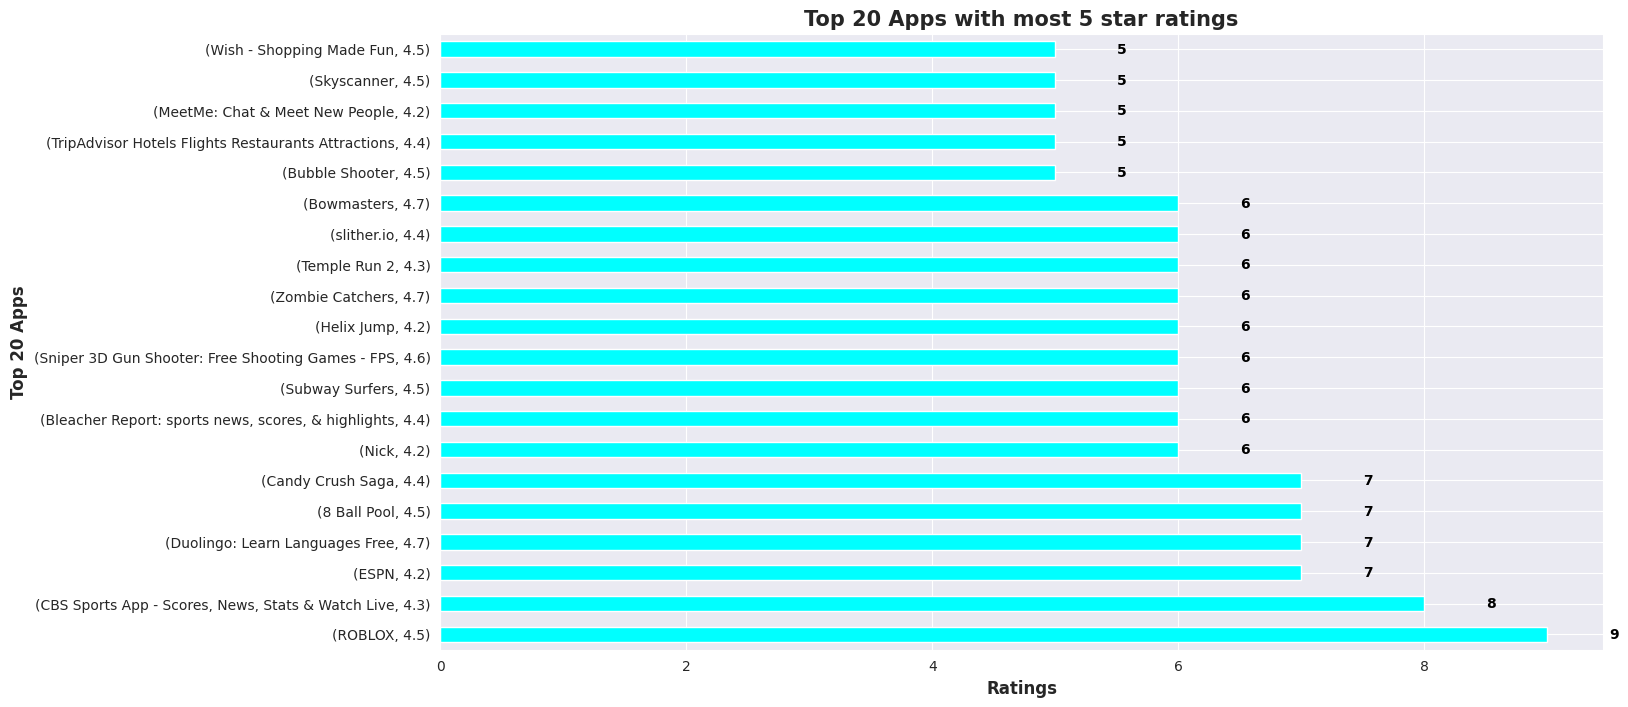

In [30]:
ratings = gps[['App', 'Rating']].value_counts(ascending=False).head(20)

plt.figure(figsize=(15, 8))
ratings.plot.barh(color = 'cyan')

for i, v in enumerate(ratings.values):
    plt.text(x=v+0.5, y=i, s=str(v), fontsize=10, color='black', fontweight='bold', va='center')

plt.xlabel('Ratings', size=12, fontweight='bold')
plt.ylabel('Top 20 Apps', size=12, fontweight='bold')
plt.title('Top 20 Apps with most 5 star ratings', size=15, fontweight='bold')
plt.show()

# **Q.6 Which apps have got 5-star ratings?**

In [31]:
gps[gps['Rating']==5].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7466,211:CK,GAME,5.0,8,38M,10,Paid,$0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7M,10,Paid,$1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up
2522,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up
5828,A-Y Collection,SHOPPING,5.0,2,2.9M,100,Free,0,Teen,Shopping,"February 16, 2018",1.2,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,ei Calc,TOOLS,5.0,2,19M,10,Free,0,Everyone,Tools,"October 12, 2015",1.2.2,2.3 and up
9178,i am EB,PHOTOGRAPHY,5.0,1,5.4M,10,Free,0,Teen,Photography,"February 1, 2017",1.0,4.1 and up
6030,iCard BD Plus,SOCIAL,5.0,2,2.4M,500,Free,0,Everyone,Social,"July 15, 2016",3.7.5,2.0 and up
7756,iReadMe,PRODUCTIVITY,5.0,8,22M,100,Free,0,Everyone,Productivity,"March 6, 2018",1.5,4.4 and up


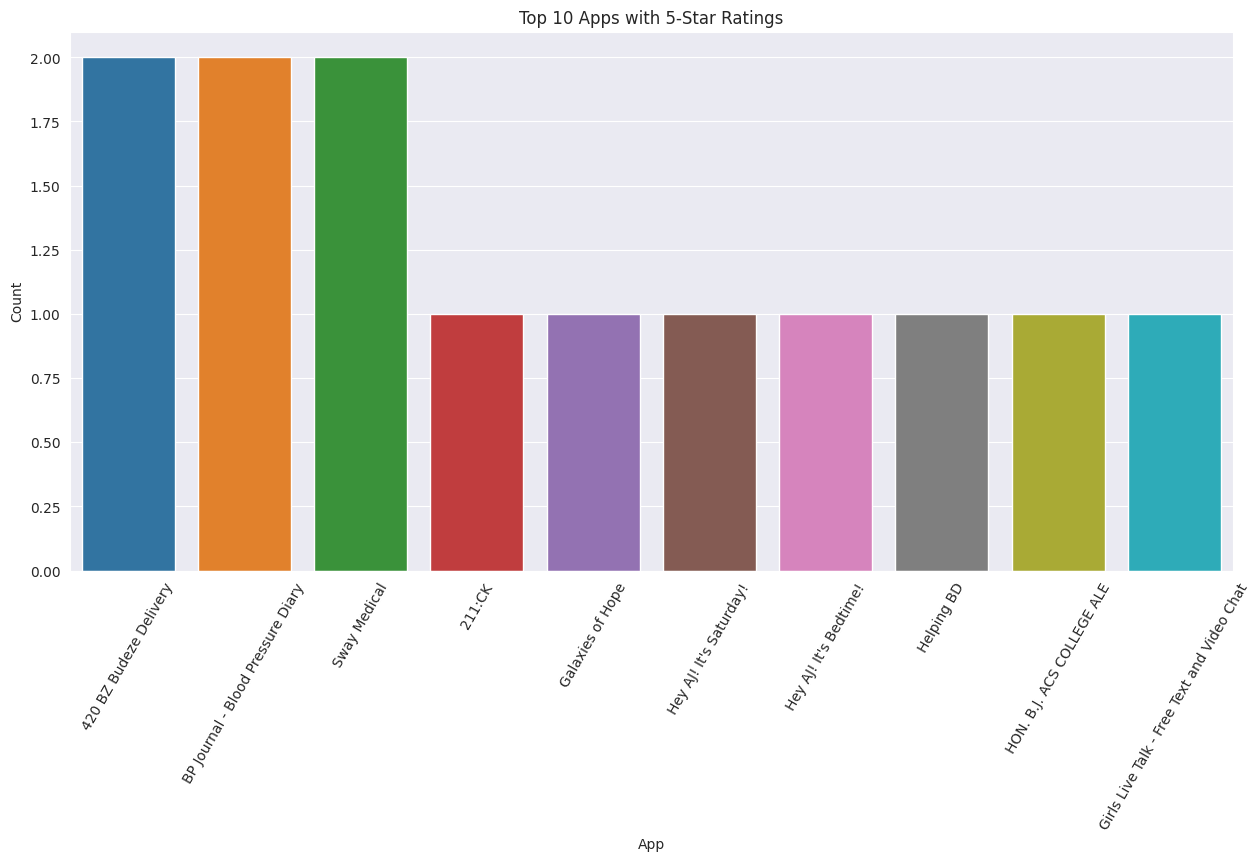

In [32]:
# Filter the DataFrame to keep only rows with 5-star ratings
five_star_ratings = gps[gps['Rating'] == 5].sort_values(by='App')

app_counts = five_star_ratings['App'].value_counts()

top_apps = app_counts.head(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=top_apps.index, y=top_apps.values)
plt.title('Top 10 Apps with 5-Star Ratings')
plt.xlabel('App')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()